### Basic Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("USA_Housing.csv")    #Importing the dataset
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


Here in the dataset, Price of the housese is the dependent variable and rest of the variables are independent variables. Here area information is already given so adress is not required for predicting price so we can drop it.

In [3]:
df = df.drop(['Address'],axis=1)   # Dropping the address

In [4]:
df.duplicated().sum()  ## Cheaking for duplicate

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              4990 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     4995 non-null   float64
 3   Avg. Area Number of Bedrooms  4994 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


In [6]:
df.dtypes

Avg. Area Income                float64
Avg. Area House Age             float64
Avg. Area Number of Rooms       float64
Avg. Area Number of Bedrooms    float64
Area Population                 float64
Price                           float64
dtype: object

### Null values imputation

In [7]:
df.isnull().sum()/len(df)*100 # Checking for Null Values

Avg. Area Income                0.20
Avg. Area House Age             0.00
Avg. Area Number of Rooms       0.10
Avg. Area Number of Bedrooms    0.12
Area Population                 0.00
Price                           0.00
dtype: float64

##### Here less than 70% null values are present so we need to impute rather dropping them. In the case of null values imputation categorical variables need to impute by mode and numericals need to impute by median or mean. Mean should be used for the values with no outliers and rest of the cases median should be used as mean is volitile in nature and affected by outliers  

In [8]:
df['Avg. Area Income'] = df['Avg. Area Income'].fillna(df['Avg. Area Income'].median())

In [9]:
df['Avg. Area Number of Rooms'] = df['Avg. Area Number of Rooms'].fillna(df['Avg. Area Number of Rooms'].median())

In [10]:
df['Avg. Area Number of Bedrooms'] = df['Avg. Area Number of Bedrooms'].fillna(df['Avg. Area Number of Bedrooms'].median())

In [11]:
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
dtype: int64

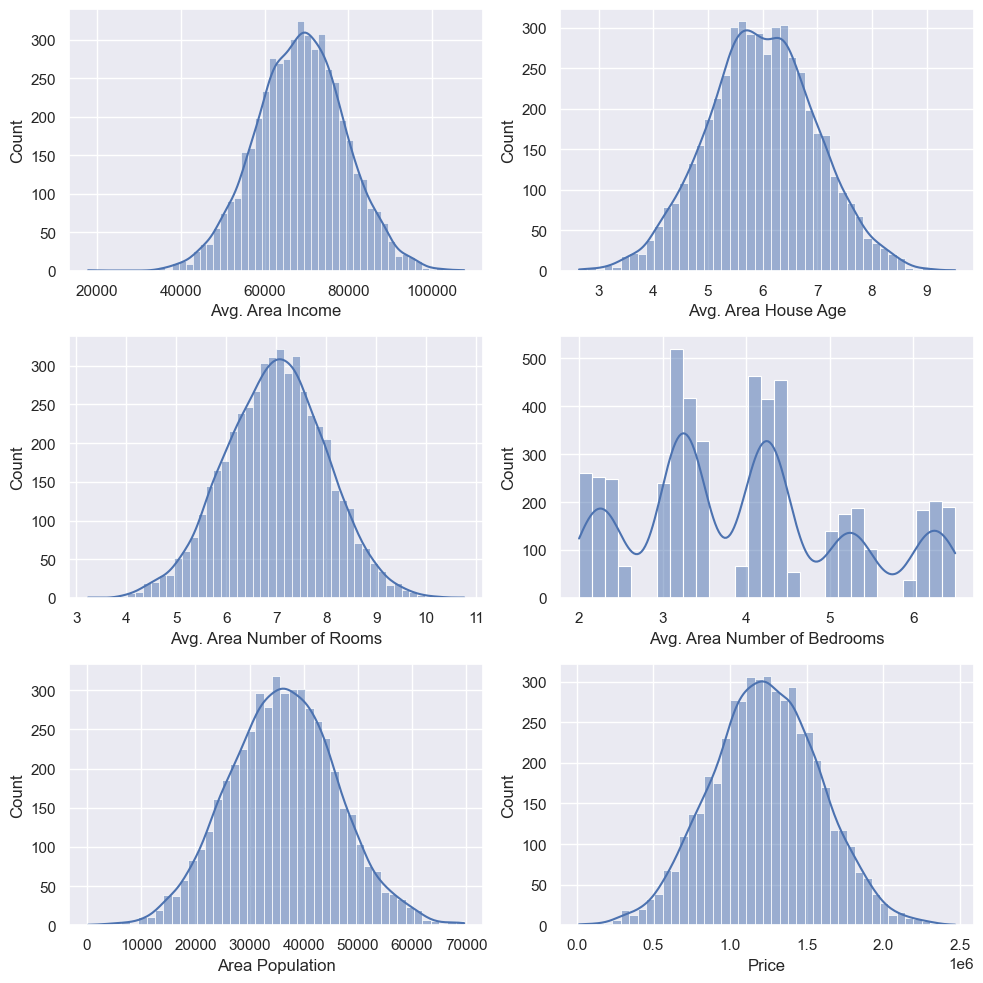

In [12]:
f, a = plt.subplots(3, 2, figsize=(10, 10), dpi=100)

num = 0

for i in range(3):
    for j in range(2):
        sns.histplot(x=df.columns[num],kde=True, data=df, ax=a[i, j])
        num += 1

plt.tight_layout()
plt.show()


### Outlier treatment using box plot method

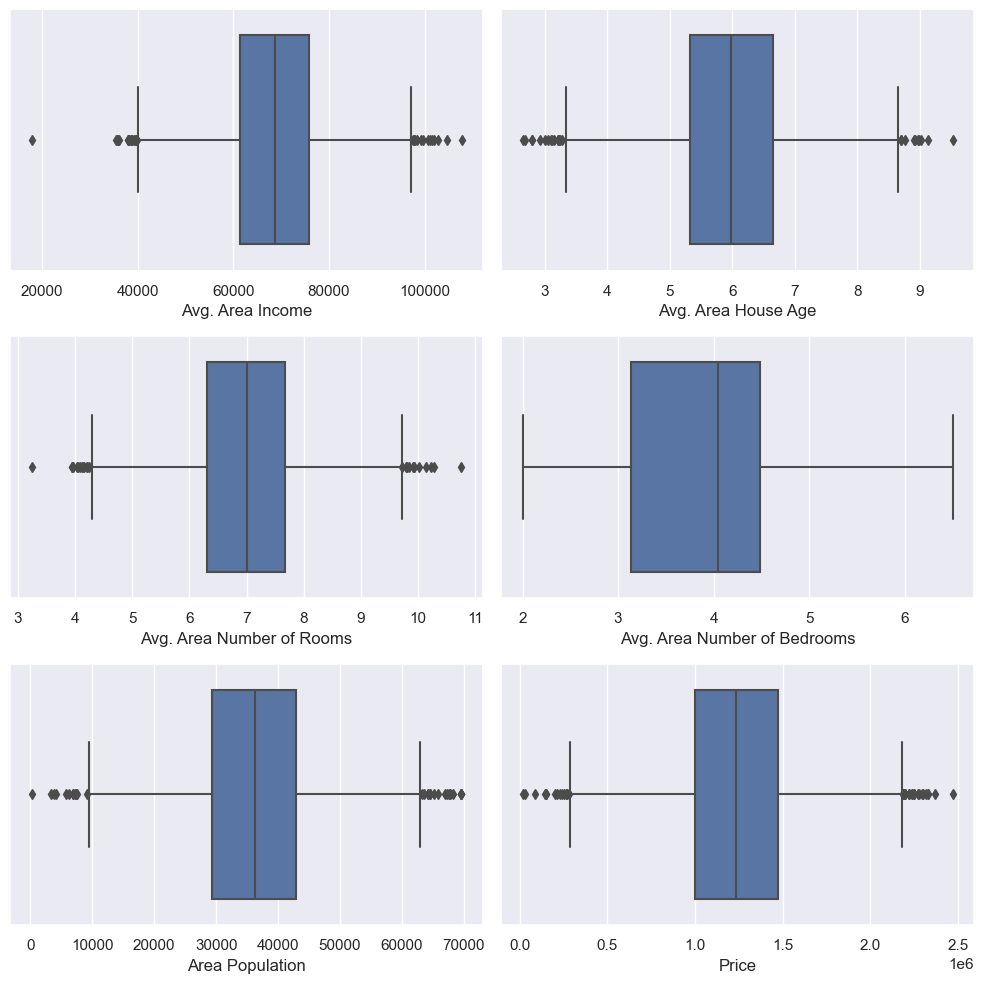

In [13]:
f, a = plt.subplots(3, 2, figsize=(10, 10), dpi=100)

num = 0

for i in range(3):
    for j in range(2):
        sns.boxplot(x=df.columns[num], data=df, ax=a[i, j])
        num += 1

plt.tight_layout()
plt.show()

In [14]:
#Outliers are present in those columns 
#1)Avg. Area Income
#2)Avg. Area House Age
#3)Avg. Area Number of Rooms
#4)Area Population


In [15]:
#Outliers treatment for Avg. Area Income

in_q1 = df['Avg. Area Income'].quantile(0.25)
in_q3 = df['Avg. Area Income'].quantile(0.75)
in_iqr =in_q3 - in_q1
lower_limit = in_q1 - 1.5*in_iqr
upper_limit = in_q3  + 1.5 * in_iqr
print(f'25th quantile: {in_q1}, 75th quantile: {in_q3}, IQR: {in_iqr}')
print(f'************************************************************************************************')
print(f'lower_limit: {lower_limit}, upper_limit: {upper_limit}')


25th quantile: 61485.1501925, 75th quantile: 75766.51910250001, IQR: 14281.368910000012
************************************************************************************************
lower_limit: 40063.096827499976, upper_limit: 97188.57246750002


In [16]:
df['Avg. Area Income'] = np.where(df['Avg. Area Income'] > upper_limit, upper_limit,
                                      np.where(df['Avg. Area Income'] < lower_limit,
                                              lower_limit, df['Avg. Area Income']))

<Axes: >

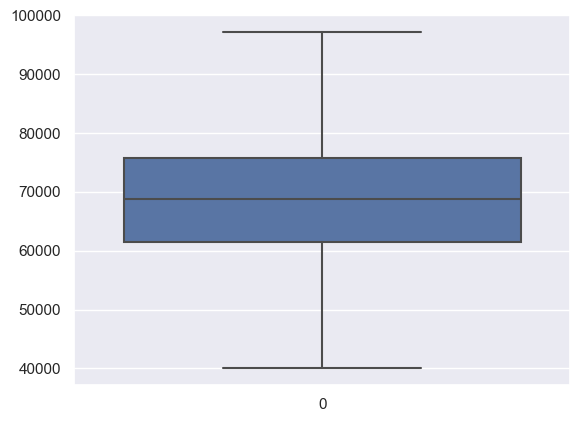

In [17]:
sns.boxplot(df['Avg. Area Income'])

In [18]:
# Outliers treatment for Avg. Area House Age

in_q1 = df['Avg. Area House Age'].quantile(0.25)
in_q3 = df['Avg. Area House Age'].quantile(0.75)
in_iqr =in_q3 - in_q1
lower_limit = in_q1 - 1.5*in_iqr
upper_limit = in_q3  + 1.5 * in_iqr
print(f'25th quantile: {in_q1}, 75th quantile: {in_q3}, IQR: {in_iqr}')
print(f'************************************************************************************************')
print(f'lower_limit: {lower_limit}, upper_limit: {upper_limit}')

25th quantile: 5.32228301575, 75th quantile: 6.65080847925, IQR: 1.3285254635000001
************************************************************************************************
lower_limit: 3.3294948205, upper_limit: 8.6435966745


In [19]:
df['Avg. Area House Age'] = np.where(df['Avg. Area House Age'] > upper_limit, upper_limit,
                                      np.where(df['Avg. Area House Age'] < lower_limit,
                                              lower_limit, df['Avg. Area House Age']))

<Axes: >

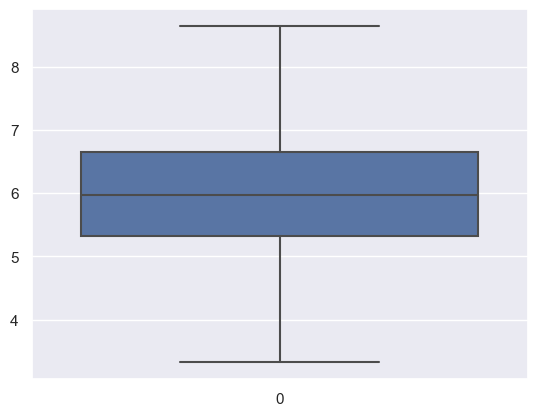

In [20]:
sns.boxplot(df['Avg. Area House Age'])

In [21]:
# Outliers treatment for Avg. Area Number of Rooms

in_q1 = df['Avg. Area Number of Rooms'].quantile(0.25)
in_q3 = df['Avg. Area Number of Rooms'].quantile(0.75)
in_iqr =in_q3 - in_q1
lower_limit = in_q1 - 1.5*in_iqr
upper_limit = in_q3  + 1.5 * in_iqr
print(f'25th quantile: {in_q1}, 75th quantile: {in_q3}, IQR: {in_iqr}')
print(f'************************************************************************************************')
print(f'lower_limit: {lower_limit}, upper_limit: {upper_limit}')

25th quantile: 6.29969161825, 75th quantile: 7.6652805545, IQR: 1.36558893625
************************************************************************************************
lower_limit: 4.251308213874999, upper_limit: 9.713663958875


In [22]:
df['Avg. Area Number of Rooms'] = np.where(df['Avg. Area Number of Rooms'] > upper_limit, upper_limit,
                                      np.where(df['Avg. Area Number of Rooms'] < lower_limit,
                                              lower_limit, df['Avg. Area Number of Rooms']))

<Axes: >

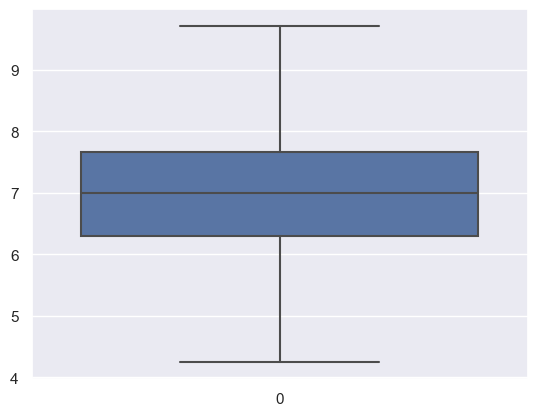

In [23]:
sns.boxplot(df['Avg. Area Number of Rooms'])

In [24]:
# Outliers treatment for Avg. Area Number of Rooms

in_q1 = df['Area Population'].quantile(0.25)
in_q3 = df['Area Population'].quantile(0.75)
in_iqr =in_q3 - in_q1
lower_limit = in_q1 - 1.5*in_iqr
upper_limit = in_q3  + 1.5 * in_iqr
print(f'25th quantile: {in_q1}, 75th quantile: {in_q3}, IQR: {in_iqr}')
print(f'************************************************************************************************')
print(f'lower_limit: {lower_limit}, upper_limit: {upper_limit}')

25th quantile: 29403.9287, 75th quantile: 42861.29077, IQR: 13457.36207
************************************************************************************************
lower_limit: 9217.885595000003, upper_limit: 63047.333875


In [25]:
df['Area Population'] = np.where(df['Area Population'] > upper_limit, upper_limit,
                                      np.where(df['Area Population'] < lower_limit,
                                              lower_limit, df['Area Population']))

<Axes: >

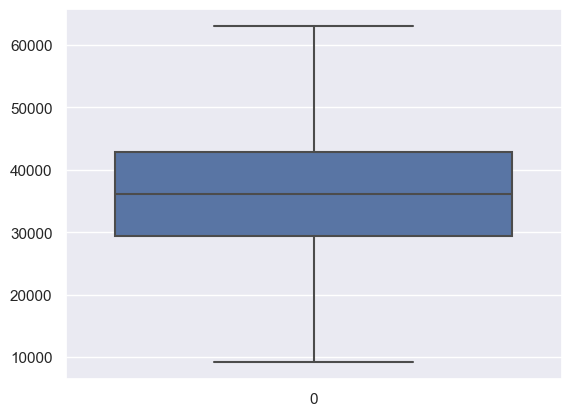

In [26]:
sns.boxplot(df['Area Population'])

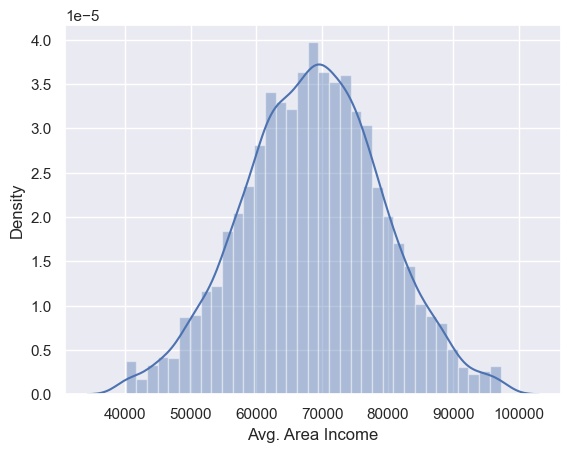

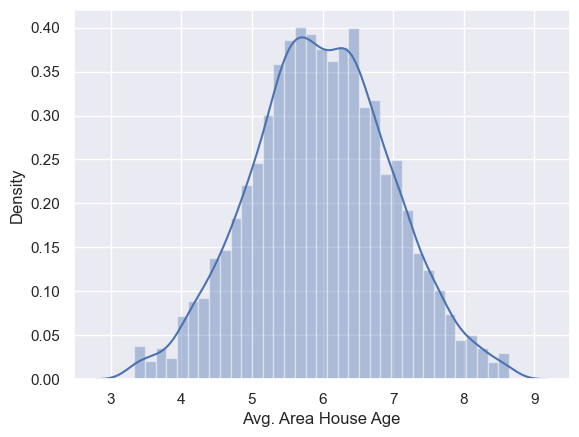

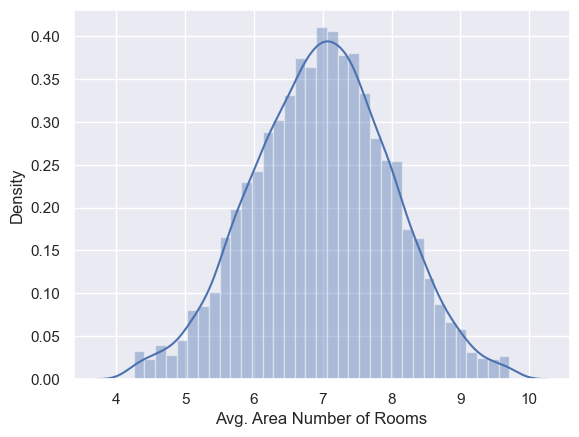

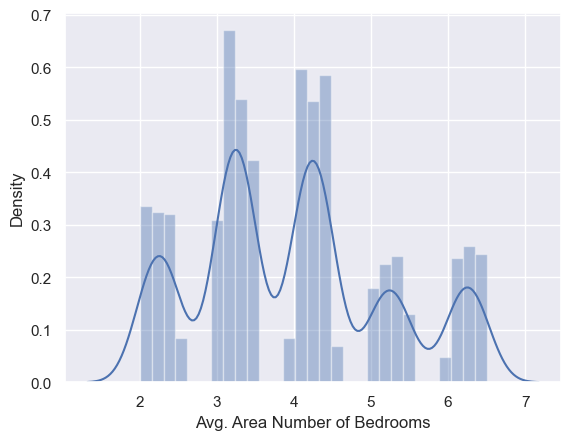

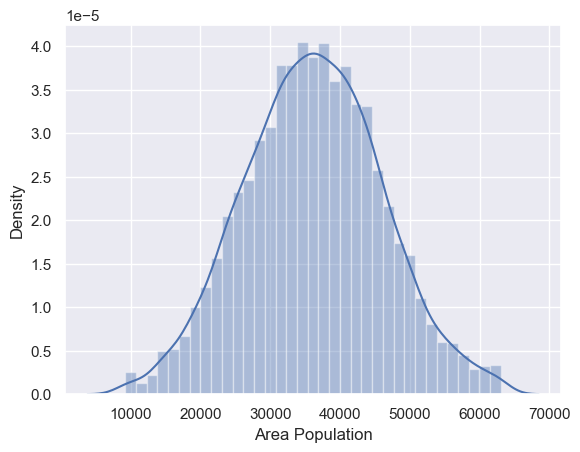

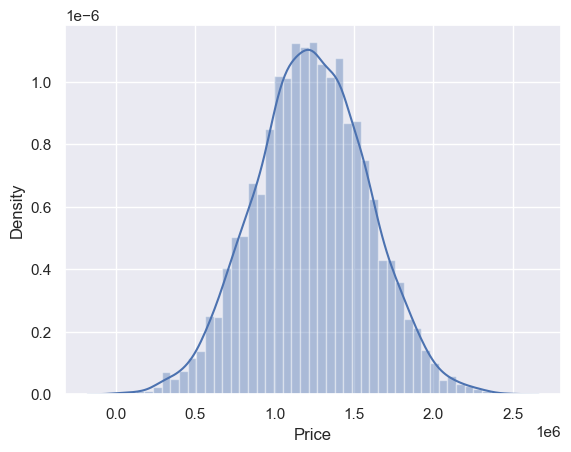

In [27]:
def distplots(col):
    sns.distplot(df[col])
    plt.show()
    
for i in list(df.columns)[0:]:
    distplots(i)
    
plt.show()

In [28]:
df.head(3)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1059033.558
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1505890.915
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1058987.988


In [29]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68587.479539,5.977490,6.987540,3.981956,36159.070769,1.232073e+06
std,10574.362055,0.986995,1.001419,1.233758,9862.221143,3.531176e+05
min,40063.096827,3.329495,4.251308,2.000000,9217.885595,1.593866e+04
25%,61485.150192,5.322283,6.299692,3.140000,29403.928700,9.975771e+05
50%,68797.671885,5.970429,7.002940,4.050000,36199.406690,1.232669e+06
75%,75766.519103,6.650808,7.665281,4.490000,42861.290770,1.471210e+06
max,97188.572468,8.643597,9.713664,6.500000,63047.333875,2.469066e+06


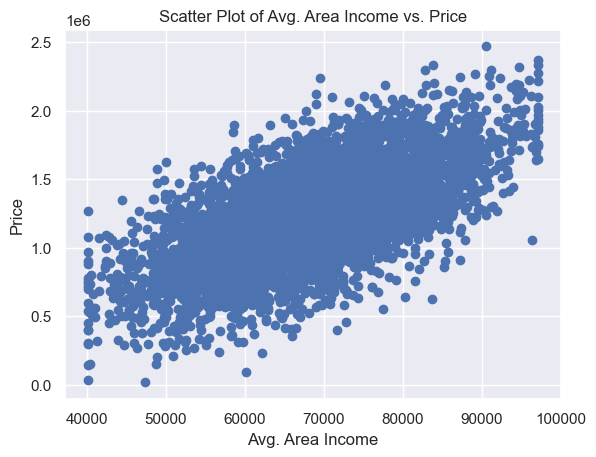

In [30]:
plt.scatter(df['Avg. Area Income'], df['Price'])
plt.xlabel('Avg. Area Income')
plt.ylabel('Price')
plt.title('Scatter Plot of Avg. Area Income vs. Price')
plt.show()

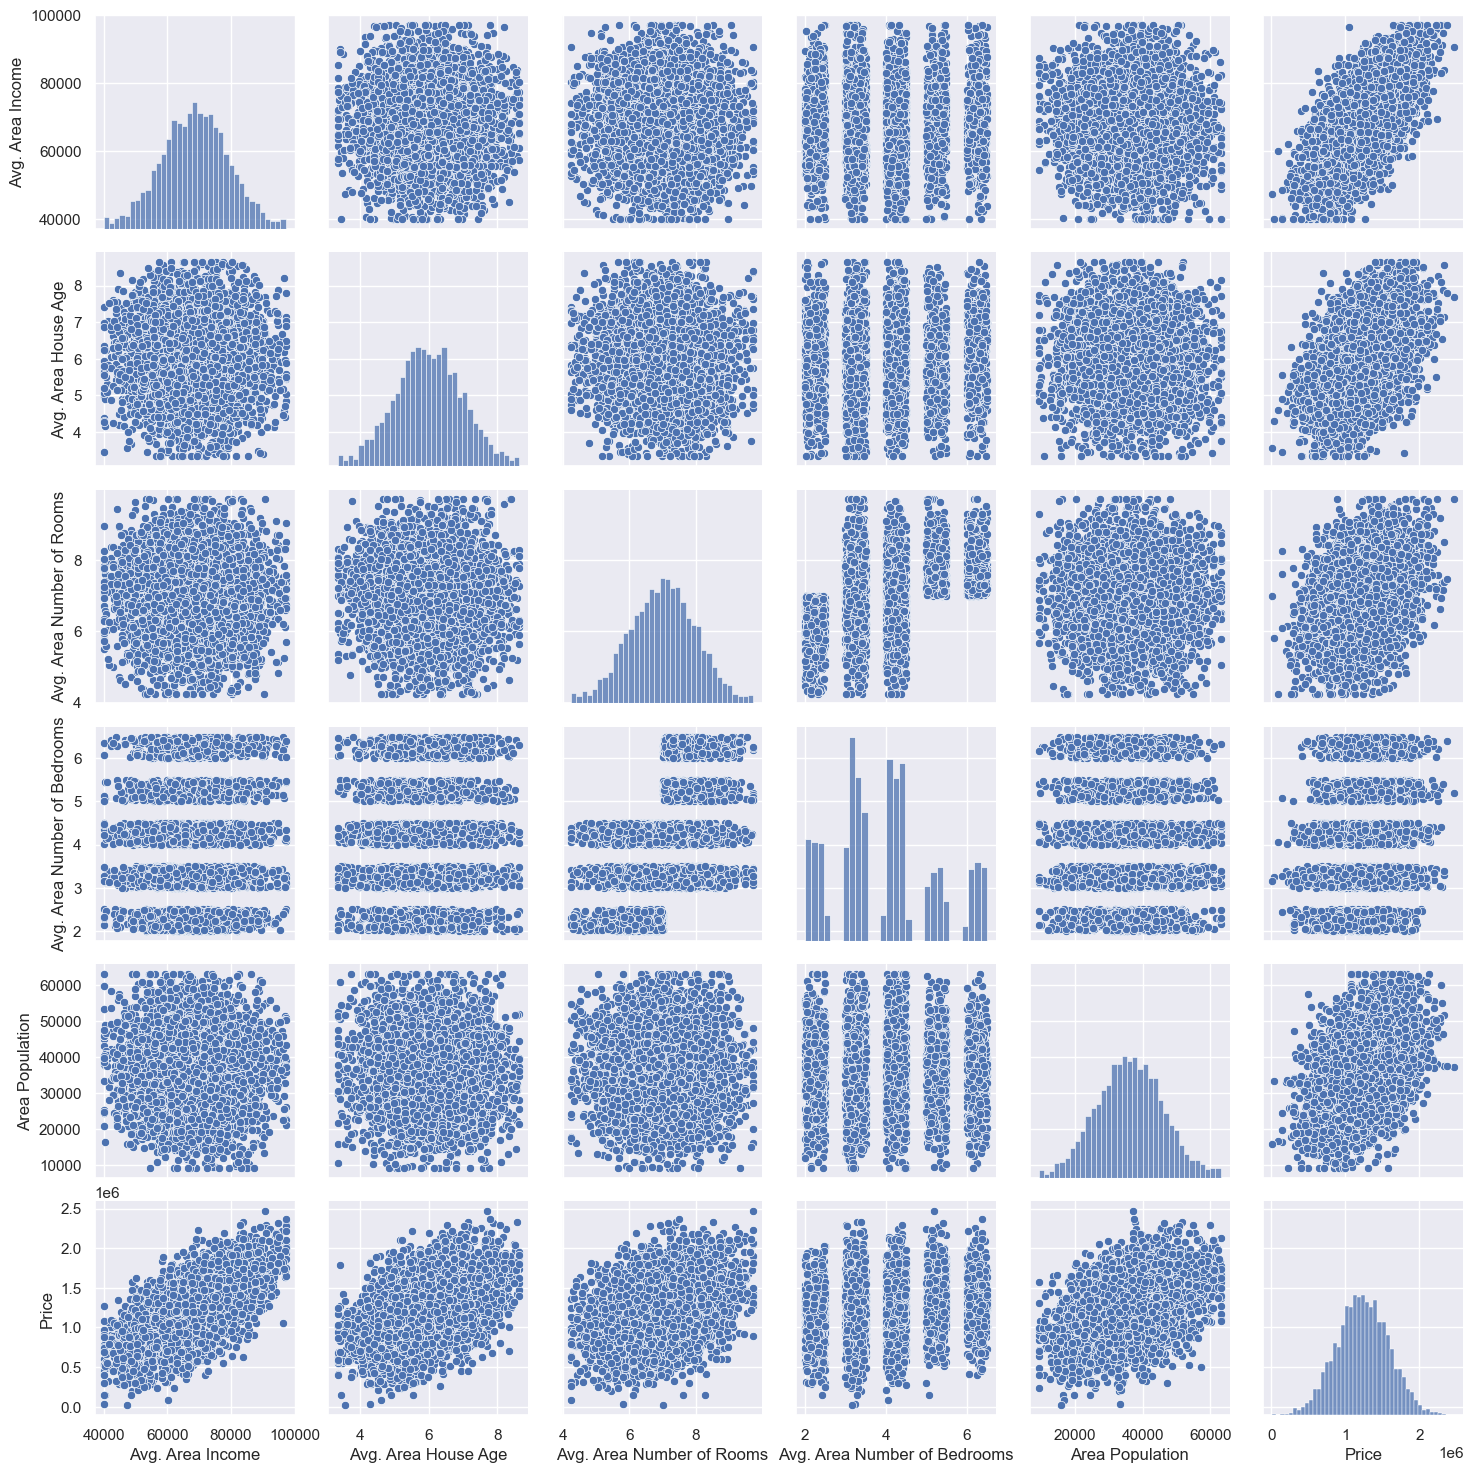

In [31]:
sns.pairplot(data=df)
plt.show()

In [32]:
# Spliting the data into dependent and independent variables 

x = df[['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population']]

In [33]:
x    # Independent variables 

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.45857,5.682861,7.009188,4.09,23086.80050
1,79248.64245,6.002900,6.730821,3.09,40173.07217
2,61287.06718,5.865890,8.512727,5.13,36882.15940
3,63345.24005,7.188236,5.586729,3.26,34310.24283
4,59982.19723,5.040555,7.839388,4.23,26354.10947
...,...,...,...,...,...
4995,60567.94414,7.830362,6.137356,3.46,22837.36103
4996,78491.27543,6.999135,6.576763,4.02,25616.11549
4997,63390.68689,7.250591,4.805081,2.13,33266.14549
4998,68001.33124,5.534388,7.130144,5.44,42625.62016


In [34]:
y = df['Price']  # Dependent variable

In [35]:
y

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64

In [36]:
# Feature Scaling 

from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
sc_x = scale.fit_transform(x)

In [37]:
pd.DataFrame(sc_x)

,0,1,2,3,4
0,1.036382,-0.298541,0.021620,0.087582,-1.325622
1,1.008309,0.025747,-0.256381,-0.723031,0.407049
2,-0.690457,-0.113082,1.523179,0.930619,0.073326
3,-0.495800,1.226822,-1.398967,-0.585227,-0.187484
4,-0.813869,-0.949376,0.850726,0.201068,-0.994293
...,...,...,...,...,...
4995,-0.758470,1.877474,-0.849064,-0.423104,-1.350917
4996,0.936679,1.035210,-0.410236,0.030839,-1.069131
4997,-0.491501,1.290004,-2.179585,-1.501219,-0.293363
4998,-0.055437,-0.448985,0.142416,1.181909,0.655755


In [38]:
# Checking for multicolinearity with VIF
varible = sc_x
varible.shape

(5000, 5)

In [39]:
# variance_inflation_factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor
varible = sc_x
vif = pd.DataFrame()
vif['variance_inflation_factor'] = [variance_inflation_factor(varible, i) for i in range(varible.shape[1])]

vif['Features'] = x.columns

In [40]:
vif

,variance_inflation_factor,Features
0,1.001067,Avg. Area Income
1,1.000593,Avg. Area House Age
2,1.274864,Avg. Area Number of Rooms
3,1.275727,Avg. Area Number of Bedrooms
4,1.001144,Area Population


A variance inflation factor (VIF) is a metric used to gauge the presence of multicollinearity in regression analysis. Multicollinearity arises when there is a correlation among several independent variables in a multiple regression model, potentially skewing the results. Thus, the variance inflation factor can estimate how much the variance of a regression coefficient is inflated due to multicollinearity. In the present case, VIF score is less than 5 for each variable so, there are no issues of multicollinearity among the independent variables. 

In [41]:
#Finding corelation using heatmap
cor = df.corr()
cor

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002622,-0.011009,0.019134,-0.014299,0.638812
Avg. Area House Age,-0.002622,1.000000,-0.009577,0.007127,-0.018191,0.452445
Avg. Area Number of Rooms,-0.011009,-0.009577,1.000000,0.463611,0.000482,0.334657
Avg. Area Number of Bedrooms,0.019134,0.007127,0.463611,1.000000,-0.022130,0.171285
Area Population,-0.014299,-0.018191,0.000482,-0.022130,1.000000,0.408805
Price,0.638812,0.452445,0.334657,0.171285,0.408805,1.000000


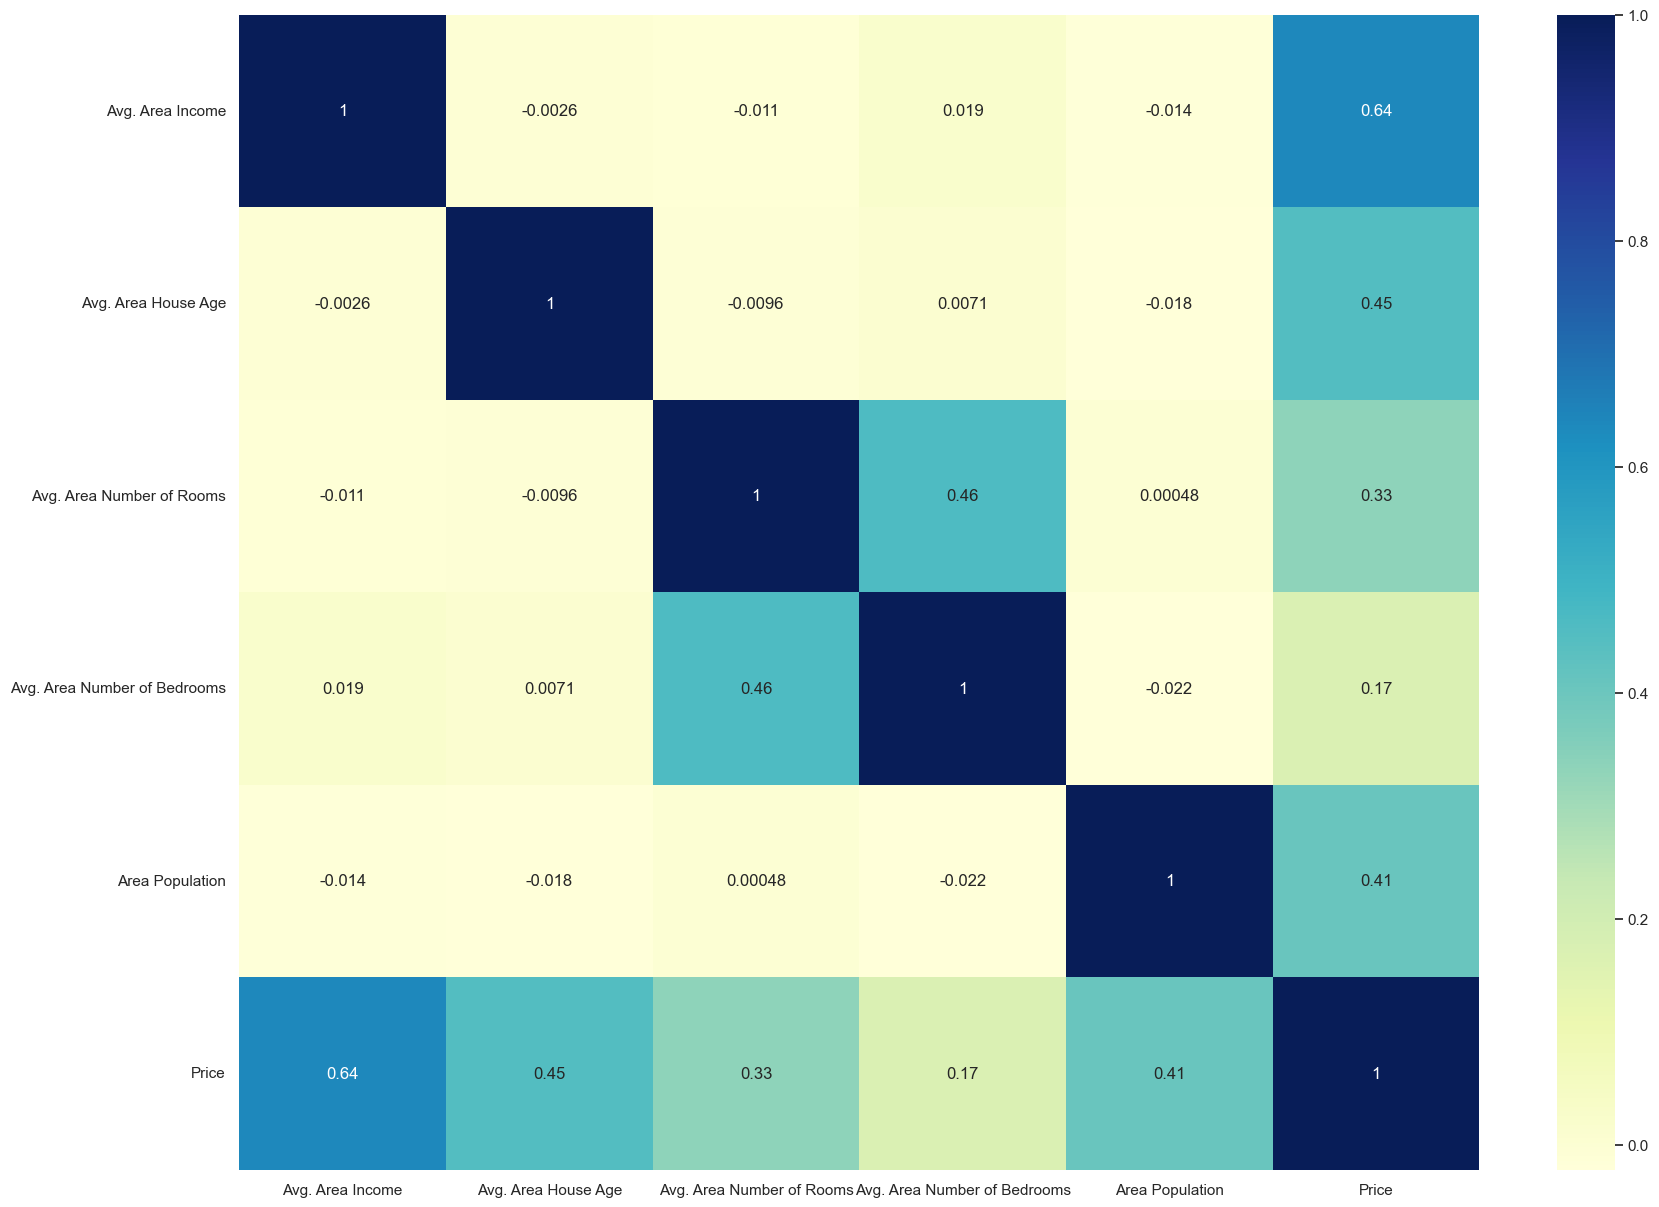

In [45]:
plt.figure(figsize=(20,15))
sns.heatmap(cor, annot=True,cmap="YlGnBu")
plt.show()

In [46]:
# Splitting the data into train and test 
# Here 80% of the data is used for tranning and 20% of the data is used for testing

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(sc_x,y,test_size=0.2, random_state=0)

In [47]:
print(f'shape of x_train: {x_train.shape}')
print(f'shape of x_test: {x_test.shape}')
print(f'shape of y_train: {y_train.shape}')
print(f'shape of y_test: {y_test.shape}')

shape of x_train: (4000, 5)
shape of x_test: (1000, 5)
shape of y_train: (4000,)
shape of y_test: (1000,)


### Linear regression model building 

In [48]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [49]:
print(f'coefficient: {lm.coef_}')
print(f'intercept: {lm.intercept_}')

coefficient: [230089.79836647 164907.85937104 121011.46030564   2338.50042151
 151655.46658258]
intercept: 1232569.6816189573


In [50]:
y_pred = lm.predict(x_test)   ## Prediction
y_pred

array([ 970015.20691167,  953873.54089577,  905675.74467137,
        489776.93992942,  715023.74698127, 1048528.11780767,
        711736.18679598,  785251.25542174, 1805979.98592654,
       1540329.4927316 ,  740742.60662758, 1145491.47923183,
       2126674.26082889,  972814.9845783 , 1152165.77717185,
        873145.19025841, 1103623.60390985,  799272.90382827,
       1205195.35248519, 1409401.74708772, 1139011.63012214,
       1062167.74160159, 1437155.98816797, 1177067.8378848 ,
       1298314.0550508 , 1119719.56378698, 1117308.81615577,
       1374272.83487721, 1590812.75128914, 1193510.61399511,
       1565845.05257402, 2011030.48943025,  891528.39578932,
       1326902.3590869 , 1184301.99349295,  746960.0908933 ,
       1082458.44910929, 1581557.00114144, 1260958.35629357,
       1334969.03345234, 1599635.49484179,  959545.86018474,
       1220329.41891917, 1115413.66094183, 1033085.47608855,
       1705508.23838423, 1016885.22909294, 1620422.12380563,
       1153282.1193102 ,

In [51]:
#Accuracy checking
from sklearn.metrics import r2_score
print("Accuracy :", r2_score(y_test, y_pred))

Accuracy : 0.9090578756842146


In [52]:
#OLS method 
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf

In [53]:
reg_model = smf.OLS(endog = y_train, exog=x_train).fit()
reg_model = smf.OLS(endog = y_test, exog=x_test).fit()

In [54]:
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.076
Model:                            OLS   Adj. R-squared (uncentered):              0.071
Method:                 Least Squares   F-statistic:                              16.26
Date:                Mon, 04 Mar 2024   Prob (F-statistic):                    1.94e-15
Time:                        07:46:25   Log-Likelihood:                         -15444.
No. Observations:                1000   AIC:                                  3.090e+04
Df Residuals:                     995   BIC:                                  3.092e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          2.404e+05   3.96e+04      6.073      0.000    1.63e+05    3.18e+05
x2          1.837e+05      4e+04      4.593      0.000    1.05e+05    2.62e+05
x3          8.976e+04   4.51e+04      1.988      0.047    1173.434    1.78e+05
x4          7.191e+04   4.37e+04      1.645      0.100   -1.39e+04    1.58e+05
x5          1.225e+05   3.86e+04      3.170      0.002    4.67e+04    1.98e+05
==============================================================================
Omnibus:                        0.217   Durbin-Watson:                   0.021
Prob(Omnibus):                  0.897   Jarque-Bera (JB):                0.144
Skew:                           0.021   Prob(JB):                        0.931
Kurtosis:                       3.041   Cond. No.                         1.67
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

After using the OLS method, here we found that,' Avg. Area Number of Bedrooms'  is non-significant as it is greater than p-value 0.05. So, we need to drop it though backward elemination

In [55]:
x = x.drop(['Avg. Area Number of Bedrooms'], axis=1)  # Backward elemination

In [56]:
x.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population
0,79545.45857,5.682861,7.009188,23086.80050
1,79248.64245,6.002900,6.730821,40173.07217
2,61287.06718,5.865890,8.512727,36882.15940
3,63345.24005,7.188236,5.586729,34310.24283
4,59982.19723,5.040555,7.839388,26354.10947


In [57]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [58]:
reg_model = smf.OLS(endog = y_train, exog=x_train).fit()
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.964
Method:                 Least Squares   F-statistic:                          2.680e+04
Date:                Mon, 04 Mar 2024   Prob (F-statistic):                        0.00
Time:                        07:46:26   Log-Likelihood:                         -55278.
No. Observations:                4000   AIC:                                  1.106e+05
Df Residuals:                    3996   BIC:                                  1.106e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Avg. Area Income             10.3008      0.303     34.052      0.000       9.708      10.894
Avg. Area House Age        5.246e+04   3320.148     15.800      0.000     4.6e+04     5.9e+04
Avg. Area Number of Rooms -8666.5831   3071.658     -2.821      0.005   -1.47e+04   -2644.419
Area Population               8.0411      0.370     21.756      0.000       7.316       8.766
==============================================================================
Omnibus:                        0.177   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.915   Jarque-Bera (JB):                0.161
Skew:                          -0.015   Prob(JB):                        0.922
Kurtosis:                       3.008   Cond. No.                     7.78e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.78e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

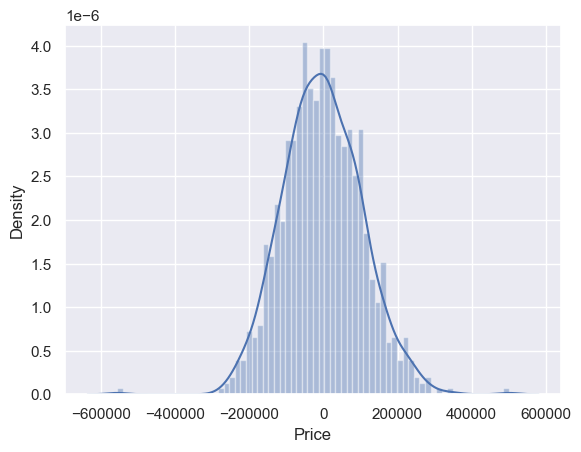

In [59]:
sns.distplot((y_test-y_pred),bins=70)
plt.show()

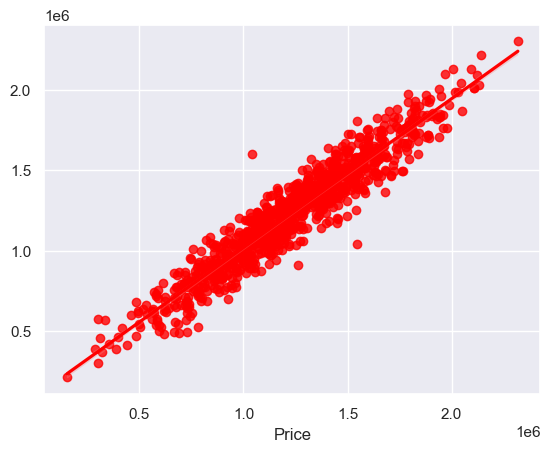

In [60]:
sns.regplot(x=y_test,y=y_pred, color='red')
plt.show()

### Performance matrix

Mean Absolute Error - MAE

In [61]:
from sklearn import metrics

In [62]:
print("MAE :",metrics.mean_absolute_error(y_test, y_pred))

MAE : 83891.88340685508


Mean Absolute Percent Error

In [63]:
print("MAPE :", metrics.mean_absolute_error(y_test, y_pred)/y_test*100)

MAPE : 398      9.381245
3833     8.991826
4836     9.111276
4572    12.125647
636     11.449171
          ...    
4228    11.112088
2367     6.958700
788     12.553864
1452     5.997589
3265     6.567494
Name: Price, Length: 1000, dtype: float64


Mean Squared Error 

In [64]:
print("MSE :", metrics.mean_squared_error(y_test, y_pred))

MSE : 11240339347.427044


Root Mean Squared Error

In [65]:
print("MSE :", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MSE : 106020.46664407323
